### Kaggle Titanic Competition

### Import Libraries

In [1540]:
import numpy as np
import pandas as pd
import os

### Loading the Data in Pandas

In [1541]:
def load_data(csv_file_name):
    csv_path = os.path.join("datasets", csv_file_name)
    return pd.read_csv(csv_path)

In [1542]:
train_data = load_data("train.csv")
test_data = load_data("test.csv")
y_test = load_data("gender_submission.csv")

In [1543]:
combined_test_data = pd.concat([test_data, y_test], axis=1)

# Remove the duplicated column (passengerID will be interested twice)
duplicated_column = combined_test_data.columns.duplicated()
combined_test_data = combined_test_data.loc[:, ~duplicated_column]

In [1544]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1545]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1546]:
train_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [1547]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [1548]:
train_data["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [1549]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


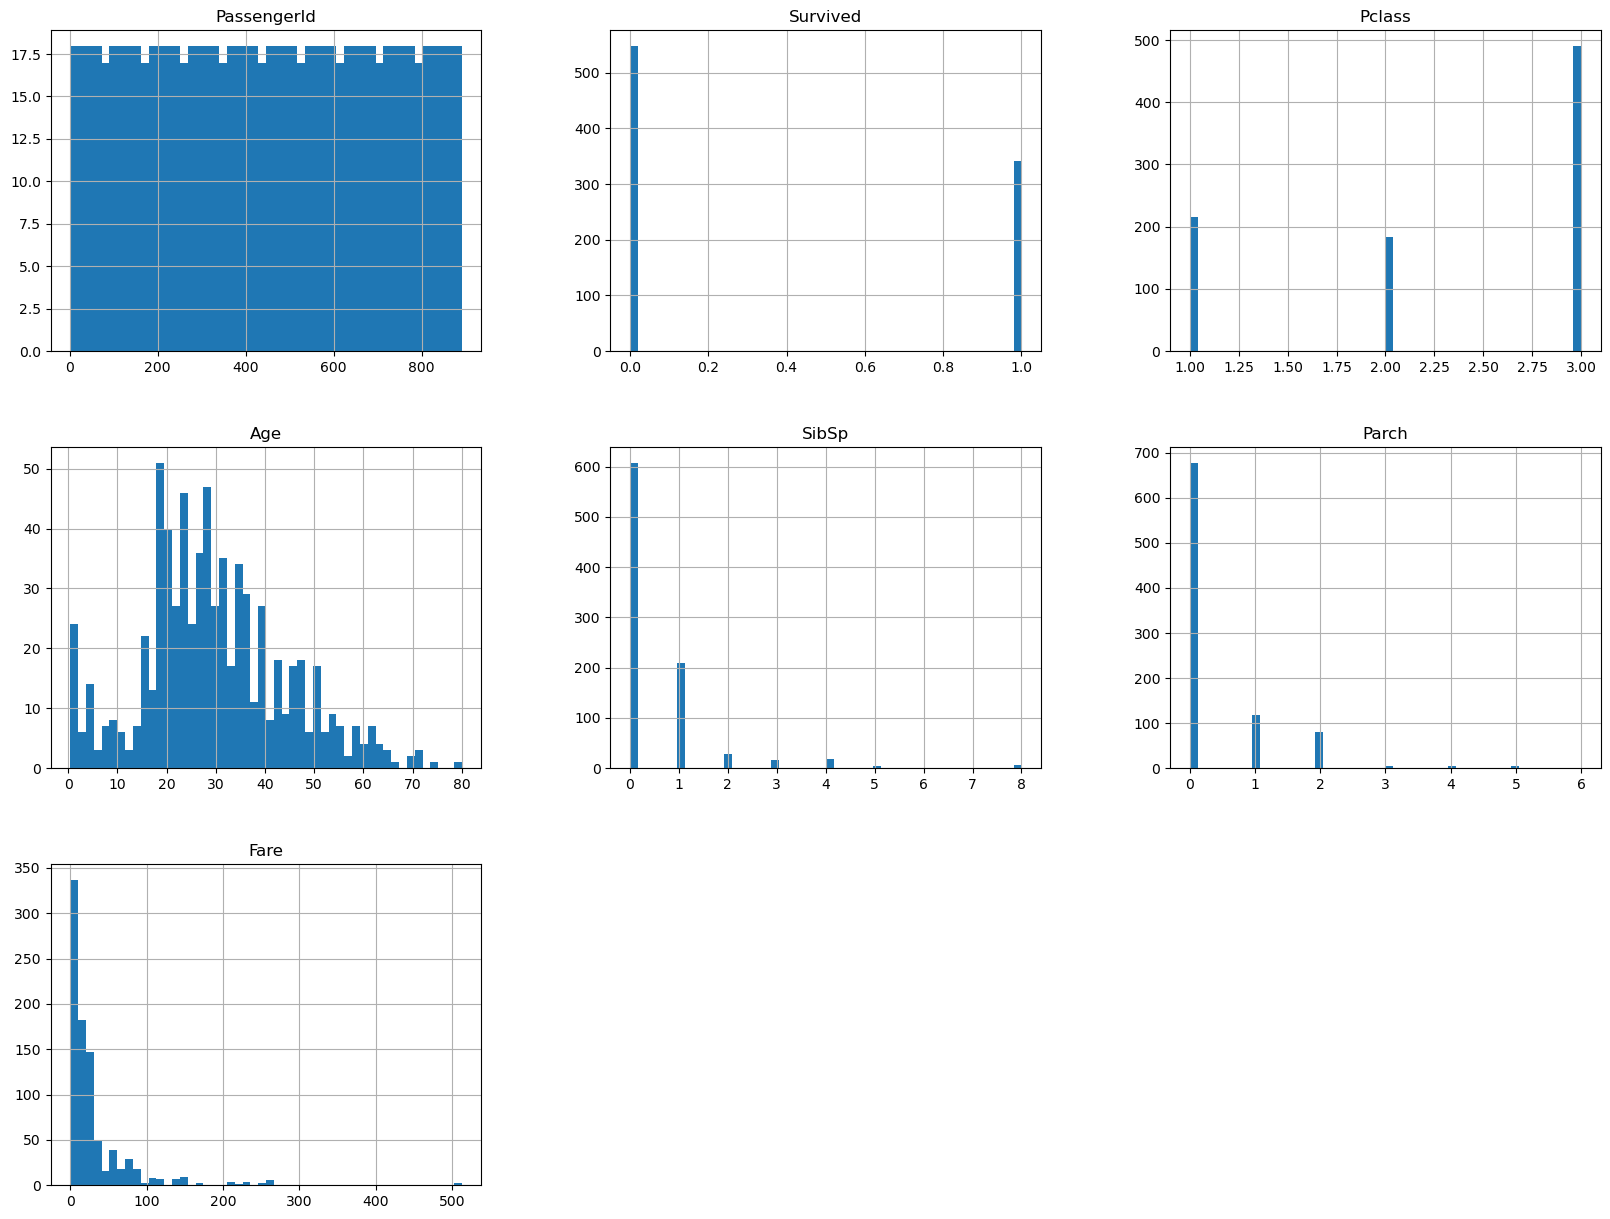

In [1550]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.show()

### Analysis of data

1. A lot of people didn't pay anything and the ones that did pay something, the currency used isn't listed.
    - The people that didn't pay anything could be staff members

### Visualising the data

In [1551]:
titanic = train_data.copy()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Pclass'>

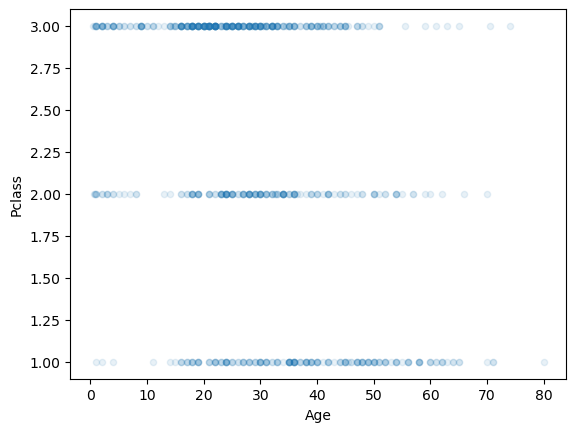

In [1552]:
titanic.plot(kind="scatter", x="Age", y="Pclass", alpha=0.1)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

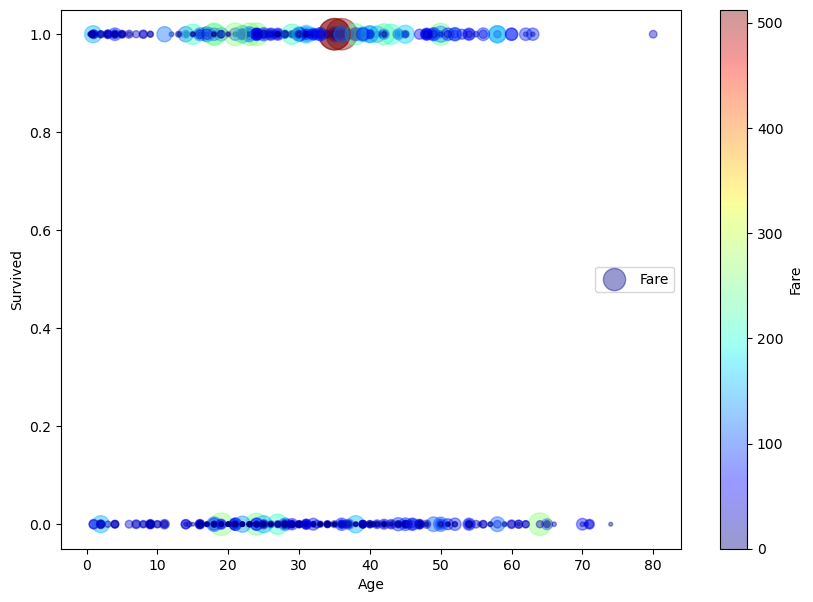

In [1553]:
%matplotlib inline
import matplotlib.pyplot as plt

titanic.plot(kind="scatter", x="Age", y="Survived", alpha=0.4,
            s=titanic["Fare"], label="Fare", figsize=(10, 7),
            c="Fare", cmap="jet", colorbar=True)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

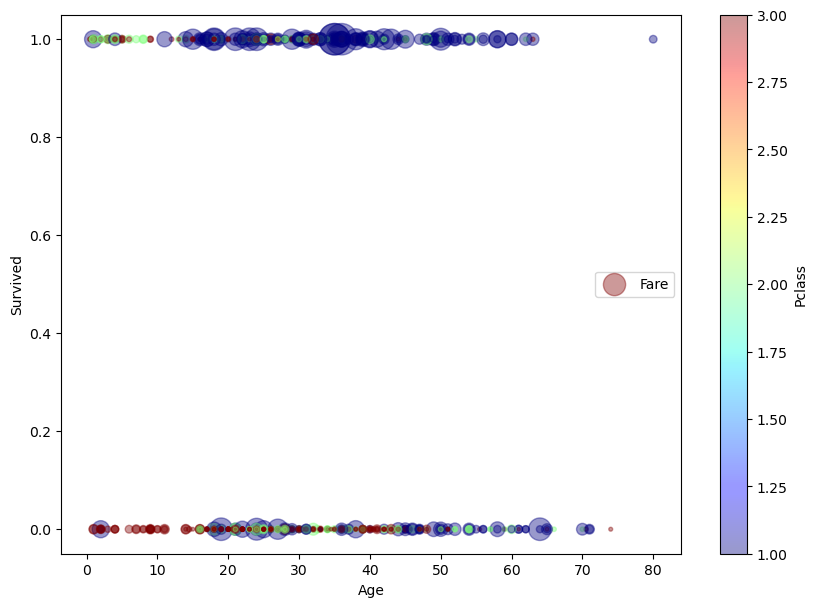

In [1554]:
%matplotlib inline
import matplotlib.pyplot as plt

titanic.plot(kind="scatter", x="Age", y="Survived", alpha=0.4,
            s=titanic["Fare"], label="Fare", figsize=(10, 7),
            c="Pclass", cmap="jet", colorbar=True)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

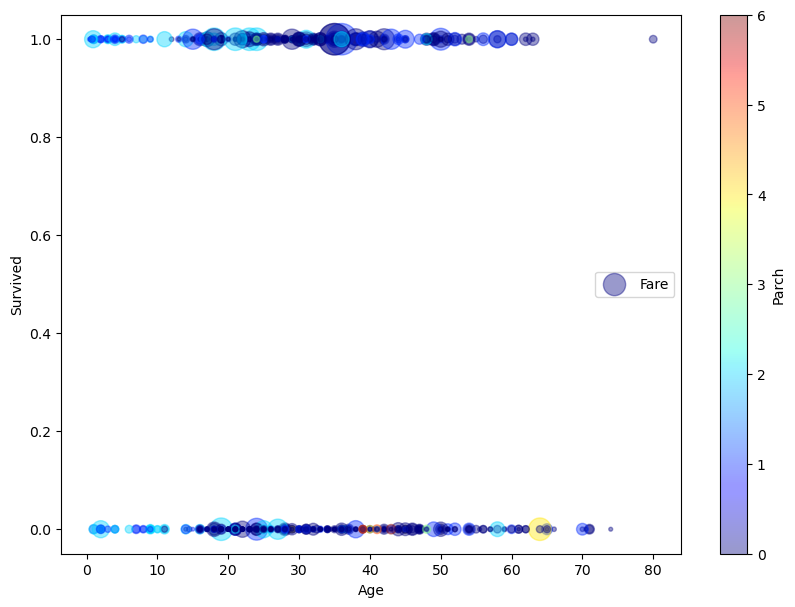

In [1555]:
%matplotlib inline
import matplotlib.pyplot as plt

titanic.plot(kind="scatter", x="Age", y="Survived", alpha=0.4,
            s=titanic["Fare"], label="Fare", figsize=(10, 7),
            c="Parch", cmap="jet", colorbar=True)

### Using the above data we can conclude: 

From the first cmap graph: The vast majority of people that payed a fare of above $350 survived.

From the second cmap graph: The vast majority of the people that survived paid a high fare and were in 3rd class.

### Looking for correlations

In [1556]:
corr_matrix = titanic.corr()
corr_matrix["Survived"].sort_values(ascending=False)

/var/folders/f4/mgygvfj161l8chd_s672fzdh0000gn/T/ipykernel_65787/2632321132.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic.corr()


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

### Hypothesis

This data shows that there is a high correlation between the people the survived and the fare they paid, like stated above. A lot of people that died were travelling alone, we can hypothesise that if parents/kids are travelling together it would've been easier to survive since there would have been someone to help them out.

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Parch'>,
        <AxesSubplot:xlabel='Fare', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', ylabel='Parch'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Parch'>],
       [<AxesSubplot:xlabel='Survived', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Fare', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Parch', ylabel='SibSp'>,
        <AxesSubplot:xlabel='SibSp', ylabel='SibSp'>]], dtype=object)

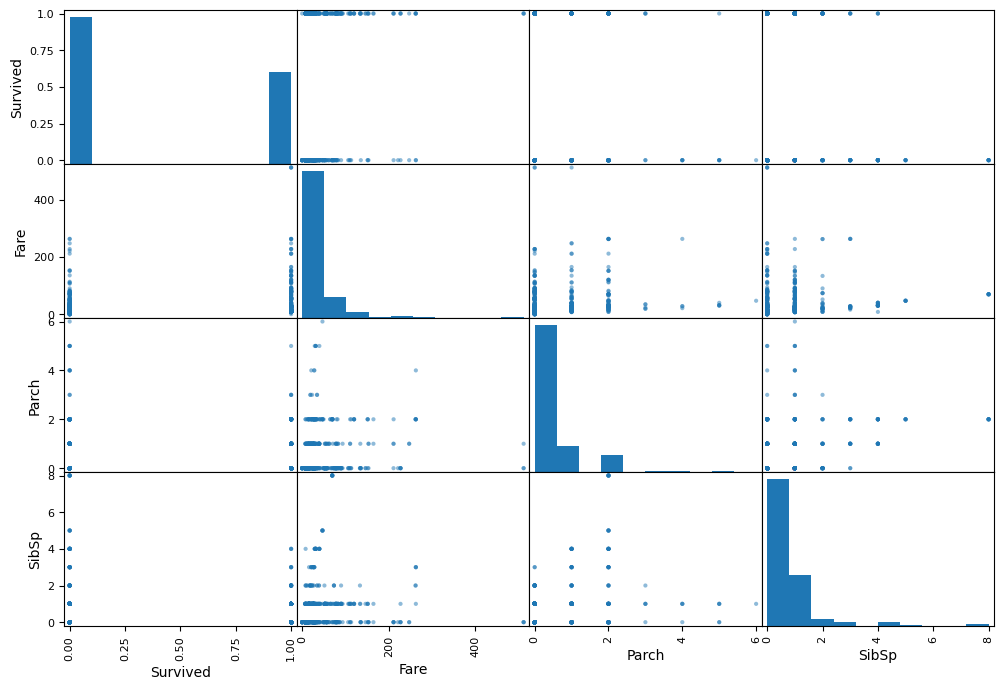

In [1557]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Fare", "Parch", "SibSp"]

scatter_matrix(titanic[attributes], figsize=(12,8))

I added an extra attribute 

In [1558]:
titanic["family_members"] = titanic["Parch"] + titanic["SibSp"]

In [1559]:
corr_matrix = titanic.corr()
corr_matrix["Survived"].sort_values(ascending=False)

/var/folders/f4/mgygvfj161l8chd_s672fzdh0000gn/T/ipykernel_65787/2632321132.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic.corr()


Survived          1.000000
Fare              0.257307
Parch             0.081629
family_members    0.016639
PassengerId      -0.005007
SibSp            -0.035322
Age              -0.077221
Pclass           -0.338481
Name: Survived, dtype: float64

### Prepare the data for the Classification Algorithm

In [1560]:
titanic = train_data.drop("Survived", axis=1)
titanic_labels = train_data["Survived"].copy()

In [1561]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Drop the cabin number since a lot of them are NaN and from the correlation we can see that they don't give any meaningful input to our data.

In [1562]:
titanic = titanic.drop("Cabin", axis=1)

From the correlation we can see that age doesn't really impact our decision in this scenario. We can drop the age aswell.

In [1563]:
# titanic = titanic.drop("Age", axis=1)

In [1564]:
titanic = titanic.drop("Name", axis=1)

In [1565]:
titanic = titanic.drop("Ticket", axis=1)

In [1566]:
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


#### Converting text data to numerical

In [1567]:
titanic_sex_cat = titanic[["Sex"]]
titanic_embarked_cat = titanic[["Embarked"]]

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

titanic["Sex_encoded"] = ordinal_encoder.fit_transform(titanic_sex_cat)
titanic["Embarked_encoded"] = ordinal_encoder.fit_transform(titanic_embarked_cat)

titanic.drop("Sex", axis=1, inplace=True)
titanic.drop("Embarked", axis=1, inplace=True)

In [1568]:
ordinal_encoder.categories_

[array(['C', 'Q', 'S', nan], dtype=object)]

In [1569]:
titanic.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded
0,1,3,22.0,1,0,7.2500,1.0,2.0
1,2,1,38.0,1,0,71.2833,0.0,0.0
2,3,3,26.0,0,0,7.9250,0.0,2.0
3,4,1,35.0,1,0,53.1000,0.0,2.0
4,5,3,35.0,0,0,8.0500,1.0,2.0


### Creating a pipeline

In [1570]:
def cleanData(df):
#     df_labels = None
#     if 'Survived' in df.columns:
#         print('Found survived')
#         df = df.drop("Survived", axis=1)
#         df_labels = combined_test_data["Survived"].copy()
    
    df.drop("Cabin", axis=1, inplace=True)
#     df.drop("Age", axis=1, inplace=True)
    df.drop("Name", axis=1, inplace=True)
    df.drop("Ticket", axis=1, inplace=True)
    
    titanic_sex_cat = df[["Sex"]]
    titanic_embarked_cat = df[["Embarked"]]
    
    ordinal_encoder = OrdinalEncoder()
    df["Sex_encoded"] = ordinal_encoder.fit_transform(titanic_sex_cat)
    df["Embarked_encoded"] = ordinal_encoder.fit_transform(titanic_embarked_cat)

    df.drop("Sex", axis=1, inplace=True)
    df.drop("Embarked", axis=1, inplace=True)
    
    return df

In [1571]:
from sklearn.preprocessing import MinMaxScaler

In [1572]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

titanic_prepared = num_pipeline.fit_transform(titanic)

### Training the binary classifier

In [1573]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

titanic_data = cleanData(train_data)

X_train = titanic_data.drop("Survived", axis=1)
y_train = titanic_data["Survived"].copy()

imputer.fit(X_train)

X_train = imputer.transform(X_train)

# Feature scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [1574]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

## Performance Measures

Using a confusion matrix and then using precision/recall to verify performance.

In [1575]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [1576]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[371, 178],
       [ 62, 280]])

In [1577]:
from sklearn.metrics import precision_score, recall_score

print(f'Precision: {precision_score(y_train, y_train_pred)}')
print(f'Recall: {recall_score(y_train, y_train_pred)}')

Precision: 0.611353711790393
Recall: 0.8187134502923976


In [1578]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.7000000000000001

## Selecting a threshold

In [1579]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

In [1580]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [1581]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [1582]:
recall_90_precision

0.5058479532163743

In [1583]:
threshold_90_precision

2.025953390012167

In [1584]:
y_train_pred_90 = y_scores >= threshold_90_precision

In [1585]:
precision_score(y_train, y_train_pred_90)

0.9010416666666666

In [1586]:
recall_score(y_train, y_train_pred_90)

0.5058479532163743

Precision and recall curve to help visualise the precision and recall rate

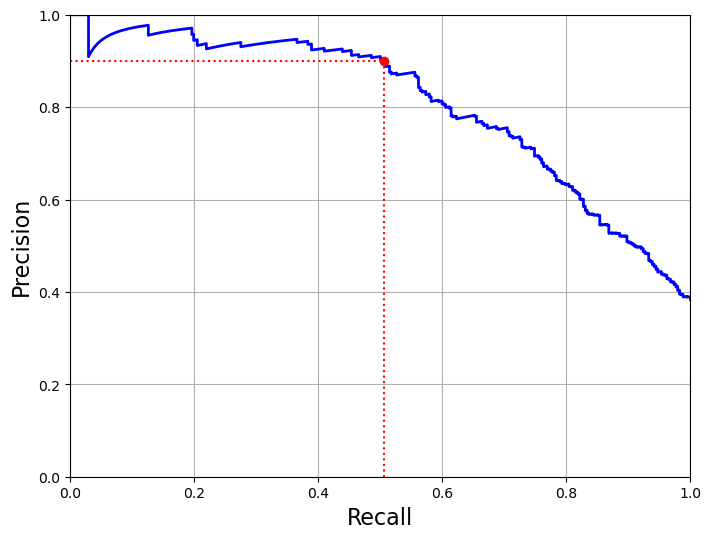

In [1587]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")

### The ROC Curve

In [1588]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

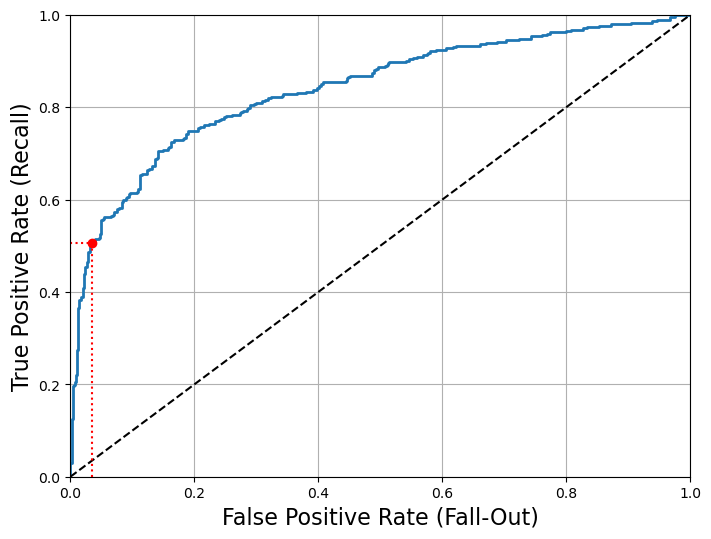

In [1589]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate (Fall-Out)", fontsize=16)
    plt.ylabel("True Positive Rate (Recall)", fontsize=16)
    plt.grid(True)
    

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.show()

In [1590]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.8401399674048509

In [1591]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")

In [1592]:
y_probas_forest

array([[0.93, 0.07],
       [0.24, 0.76],
       [0.56, 0.44],
       ...,
       [0.7 , 0.3 ],
       [0.82, 0.18],
       [0.62, 0.38]])

In [1593]:
y_scores_forest = y_probas_forest[:,1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

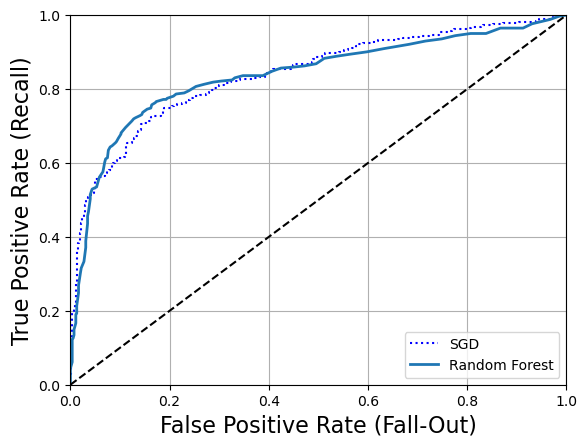

In [1594]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [1595]:
roc_auc_score(y_train, y_scores_forest)

0.8382119536850627

### Error Analysis

In [1596]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [1597]:
conf_mx

array([[493,  56],
       [109, 233]])

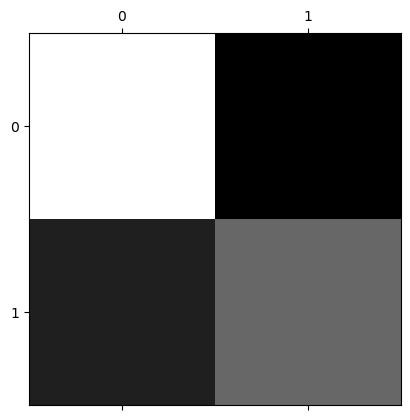

In [1598]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [1599]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_test = cleanData(test_data)

imputer.fit(X_test)

X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

forest_clf.fit(X_train, y_train)

test_pred = forest_clf.predict(X_test)

In [1600]:
test_pred = pd.DataFrame(test_pred, columns=["Survived"])

In [1601]:
test_pred

,Survived
0,0
1,1
2,0
3,0
4,0
...,...
413,1
414,1
415,0
416,1


In [1602]:
sub = pd.concat([test_data.PassengerId,test_pred],axis=1)

In [1603]:
sub.set_index('PassengerId',inplace=True)

In [1604]:
sub.to_csv(f"titanic.csv")